In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_excel(r'Downloads/Machine Learning/Minor Project/Minor Project Data set (Stock Price Prediction).xlsx')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


In [7]:
df.shape

(1009, 7)

In [8]:
df.count()

Date         1009
Open         1009
High         1009
Low          1009
Close        1009
Adj Close    1009
Volume       1009
dtype: int64

In [9]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [10]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [12]:
df['Date'].dt.year.unique()

array([2018, 2019, 2020, 2021, 2022], dtype=int64)

In [13]:
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,5,2
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,6,2
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,7,2
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,8,2
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,9,2


In [14]:
df.drop('Date',axis=1,inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Day,Month
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,5,2
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,6,2
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,7,2
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,8,2
4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,9,2


In [15]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
Day            int64
Month          int64
dtype: object

<Axes: >

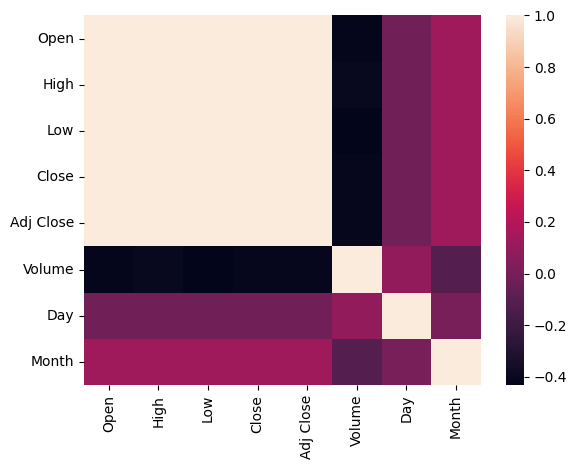

In [16]:
sns.heatmap(df.corr(), fmt='.2g')

<Axes: >

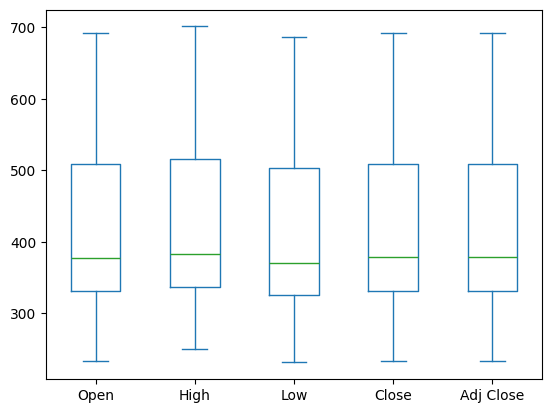

In [17]:
df[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [18]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df=scaler.fit_transform(df)
df[0]

array([-1.44777164, -1.4414654 , -1.51014126, -1.52204669, -1.52204669,
        0.7917907 , -1.22417332, -1.32500464])

In [20]:
from sklearn.model_selection import train_test_split as tts
x=df[:,:-1]
y=df[:,-1]

In [21]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.1,random_state=69)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(908, 7)
(101, 7)
(908,)
(101,)


In [22]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [23]:
from sklearn.metrics import mean_squared_error,r2_score
def metrics(y_true,y_pred):
    print(f'RMSE:',mean_squared_error(y_true,y_pred)**0.5)
    print(f'R_Squared value:',r2_score(y_true,y_pred))
def accuracy(y_true,y_pred):
    errors=abs(y_true-y_pred)
    mape=100*np.mean(errors/y_true)
    accuracy=100-mape
    return accuracy

In [24]:
y_pred=model.predict(x_test)

In [25]:
metrics(y_test,y_pred)

RMSE: 0.978319759260928
R_Squared value: -0.011528887829261647


In [26]:
accuracy(y_test,y_pred)

92.39432579300914

In [27]:
from sklearn.ensemble import RandomForestRegressor
model_random_forest=RandomForestRegressor(n_estimators=500,min_samples_split=3)
model_random_forest.fit(x_train,y_train)

RandomForestRegressor(min_samples_split=3, n_estimators=500)

In [28]:
pred_rf=model_random_forest.predict(x_test)

In [29]:
metrics(y_test,pred_rf)

RMSE: 0.8875084902699578
R_Squared value: 0.16754326245423157


In [30]:
accuracy(y_test,pred_rf)

92.57197370112634

In [31]:
from sklearn.ensemble import AdaBoostRegressor

In [32]:
from sklearn import metrics

In [33]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.95710955136036
